In [1]:
%bash
pip install nnet-ts

  Running setup.py bdist_wheel for nnet-ts: started
  Running setup.py bdist_wheel for nnet-ts: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/47/fa/23/e16e8876275e58d1a4a6415e8d0eb1bdeb26dd58737d674a77
Successfully built nnet-ts


In [32]:
from nnet_ts import *
time_series = np.array(pd.read_csv("house.csv")["X"])
time = np.array(pd.read_csv("house.csv")["time"])

Using TensorFlow backend.


In [33]:
neural_net = TimeSeriesNnet(hidden_layers = [30, 15, 5], activation_functions = ['sigmoid', 'sigmoid', 'sigmoid'])

INFO:Building regressor matrix
INFO:Scaling data
INFO:Checking network consistency
INFO:Training neural net


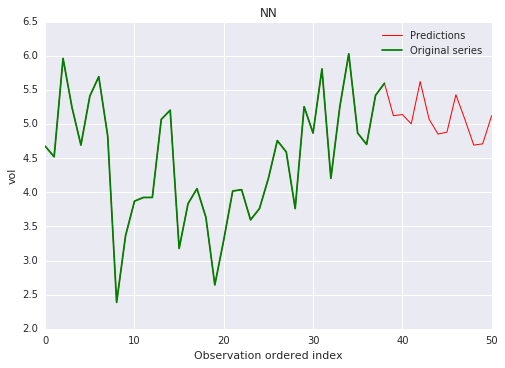

In [38]:
new1=neural_net.fit(time_series, lag = 24, epochs = 3000)
new2=pandas.DataFrame(neural_net.predict_ahead(n_ahead = 12))
import matplotlib.pyplot as plt
plt.plot(range(len(neural_net.timeseries)), neural_net.timeseries, '-r', label='Predictions', linewidth=1)
plt.plot(range(len(time_series)), time_series, '-g',  label='Original series')
plt.title("NN")
plt.xlabel("Observation ordered index")
plt.ylabel("vol")
plt.legend()
plt.show()

In [44]:
join=pandas.DataFrame(time, time_series)
join
pd.concat([join,new2])


,0
4.677790,1.000000
4.521864,2.000000
5.964577,3.000000
5.246619,4.000000
4.694343,5.000000
5.412301,6.000000
5.696937,7.000000
4.828833,8.000000
2.387288,9.000000
3.363906,10.000000


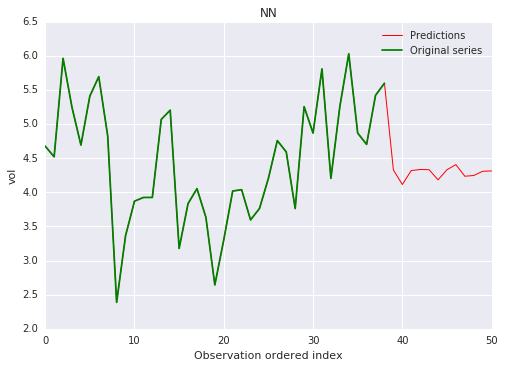

In [32]:
import matplotlib.pyplot as plt
plt.plot(range(len(neural_net.timeseries)), neural_net.timeseries, '-r', label='Predictions', linewidth=1)
plt.plot(range(len(time_series)), time_series, '-g',  label='Original series')
plt.title("NN")
plt.xlabel("Observation ordered index")
plt.ylabel("vol")
plt.legend()
plt.show()

In [31]:
new2

NameError: name 'new2' is not defined

In [4]:
time_series = np.array(pd.read_csv("new.csv")["y"])
time = np.array(pd.read_csv("new.csv")["time"])
x1 = np.array(pd.read_csv("new.csv")["x1"])
x2 = np.array(pd.read_csv("new.csv")["x2"])
neural_net = TimeSeriesNnet(hidden_layers = [30, 15, 5], activation_functions = ['sigmoid', 'sigmoid', 'sigmoid'])
new1=neural_net.fit(time_series, lag = 24, epochs = 1500)
new2=neural_net.predict_ahead(n_ahead = 12)
import matplotlib.pyplot as plt
plt.plot(range(len(neural_net.timeseries)), neural_net.timeseries, '-r', label='Predictions', linewidth=1)
plt.plot(range(len(time_series)), time_series, '-g',  label='Original series')
plt.title("NN")
plt.xlabel("Observation ordered index")
plt.ylabel("vol")
plt.legend()
plt.show()

NameError: name 'np' is not defined

In [71]:
import pandas

# Read in the data.
games = pandas.read_csv("new.csv")
gt = pandas.read_csv("new_test.csv")
# Print the names of the columns in games.
print(gt.columns)
print(games.columns)

Index([u'time', u'x1', u'x2', u'y'], dtype='object')
Index([u'time', u'x1', u'x2', u'y'], dtype='object')


In [84]:
from sklearn.cross_validation import train_test_split
train = games.sample(frac=0.95)
# Select anything not in the training set and put it in the testing set.
test = gt.sample(frac=0.99)
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(36, 4)
(12, 4)


In [85]:
columns = games.columns.tolist()
col = gt.columns.tolist()
target = "y"
target2 = "y"
from sklearn.linear_model import LinearRegression
# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[col])
predictions2 = pandas.DataFrame(model.predict(train[columns]))
# Compute error between our test predictions and the actual values.
# mean_squared_error(predictions, test[target])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [55]:
predictions

,0
0,4.521864
1,5.964577
2,2.387288
3,3.303991
4,3.597102
5,3.763122
6,3.763122
7,6.032064


In [56]:
test=pandas.DataFrame(test[columns])
train=pandas.DataFrame(train[columns])
final=pd.concat([test,train])
test

,time,x1,x2,y
1,2,87,240,4.521864
2,3,108,260,5.964577
8,9,44,253,2.387288
20,21,60,253,3.303991
23,24,65,253,3.597102
24,25,68,253,3.763122
28,29,68,253,3.763122
34,35,109,253,6.032064


In [63]:

predictions

,0
0,4.521864
1,5.964577
2,2.387288
3,3.303991
4,3.597102
5,3.763122
6,3.763122
7,6.032064


In [11]:
import matplotlib.pyplot as plt
plt.plot(range(len(neural_net.timeseries)), neural_net.timeseries, '-r', label='Predictions', linewidth=1)
plt.plot(range(len(time_series)), time_series, '-g',  label='Original series')
plt.title("NN")
plt.xlabel("Observation ordered index")
plt.ylabel("vol")
plt.legend()
plt.show()

NameError: name 'neural_net' is not defined

In [30]:

df = pandas.DataFrame(model.predict(test[columns]))
df


,0
0,4.521864
1,5.964577
2,2.387288
3,3.303991
4,3.597102
5,3.763122
6,3.763122
7,6.032064
